## Matriz de correlaciones

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Librerías

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Adquisición de datos

In [3]:
datos=pd.read_csv('/content/drive/MyDrive/deuda-de-la-ciudad', index_col=0, encoding='utf-8')
datos.head()

,id,anio,trimestre,mes,no_registro,tipo_deuda,detalle_tipo_deuda,acreedor,concepto,inicio_credito,fin_credito,dias_contrato,dias_restantes_contrato,disposicion_inicial_credito,colocacion_periodo,amortizaciones_periodo,intereses_periodo,pago_servicio_deuda,saldo_periodo,endeudamiento_periodo,tasa,sobretasa,tasa_final
_id,,,,,,,,,,,,,,,,,,,,,,,
1,0,2018,4,Diciembre,145/2010,Largo Plazo,Mercado de Capitales,CI BANCO,BONO GDFCB 10-2,2010-06-25T00:00:00,2020-12-06T00:00:00,3640,529,2.520951e+09,0,0,201367979.7,201367979.7,2.520951e+09,0.000000e+00,7.9,NaN,7.9
2,1,2018,4,Diciembre,224/2007,Largo Plazo,Banca Comercial,BANCOMER,"BANCOMER 3,457",2007-08-30T00:00:00,1937-07-27T00:00:00,10924,6783,3.457974e+09,0,14809395.11,286096648.7,300906043.8,3.389146e+09,-1.480940e+07,TIIE,0.35,TIIE+0.35
3,2,2018,4,Diciembre,225/2007,Largo Plazo,Banca Comercial,BANCOMER,BANCOMER 7000,2007-08-31T00:00:00,1940-08-27T00:00:00,12050,7910,7.000000e+09,0,108919450.9,580949162.9,689868613.7,6.371209e+09,-1.089195e+08,8.91,NaN,8.91
4,3,2018,4,Diciembre,226/2007,Largo Plazo,Banca Comercial,BANCOMER,"BANCOMER 4,700",2007-08-31T00:00:00,1937-07-27T00:00:00,10923,6783,4.700000e+09,0,20128593.44,401869662.7,421998256.2,4.606450e+09,-2.012859e+07,8.8,NaN,8.8
5,4,2018,4,Diciembre,513/2008,Largo Plazo,Banca de Desarrollo,BANOBRAS,"BANOBRAS 1,914",2008-12-26T00:00:00,2019-10-25T00:00:00,3955,298,1.914681e+09,0,320373500.5,24450927.96,344824428.5,1.277433e+08,-3.203735e+08,TIIE,0.97,TIIE+0.97


# Heatmap

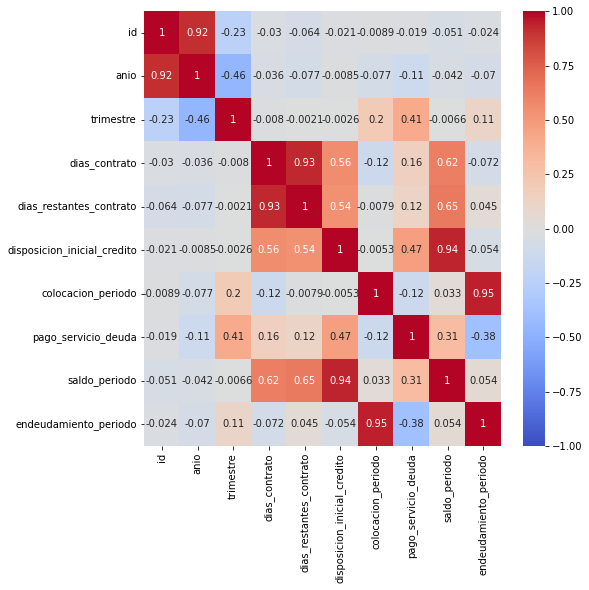

In [4]:
plt.figure(figsize=(8,8))
sns.heatmap(datos.corr(),vmin=-1,vmax=1, annot=True, cmap='coolwarm')

Si bien se observaron relaciones muy altas entre variables como la colocación del periodo y el endeudamiento del periodo, son relaciones totalmente lógicas por la naturaleza de la variable, así que no tenía sentido que se revisara su relación. 
Sin embargo, se realizó un pairplot de las variables para que las relaciones entre variables se observaran de una mejor manera.

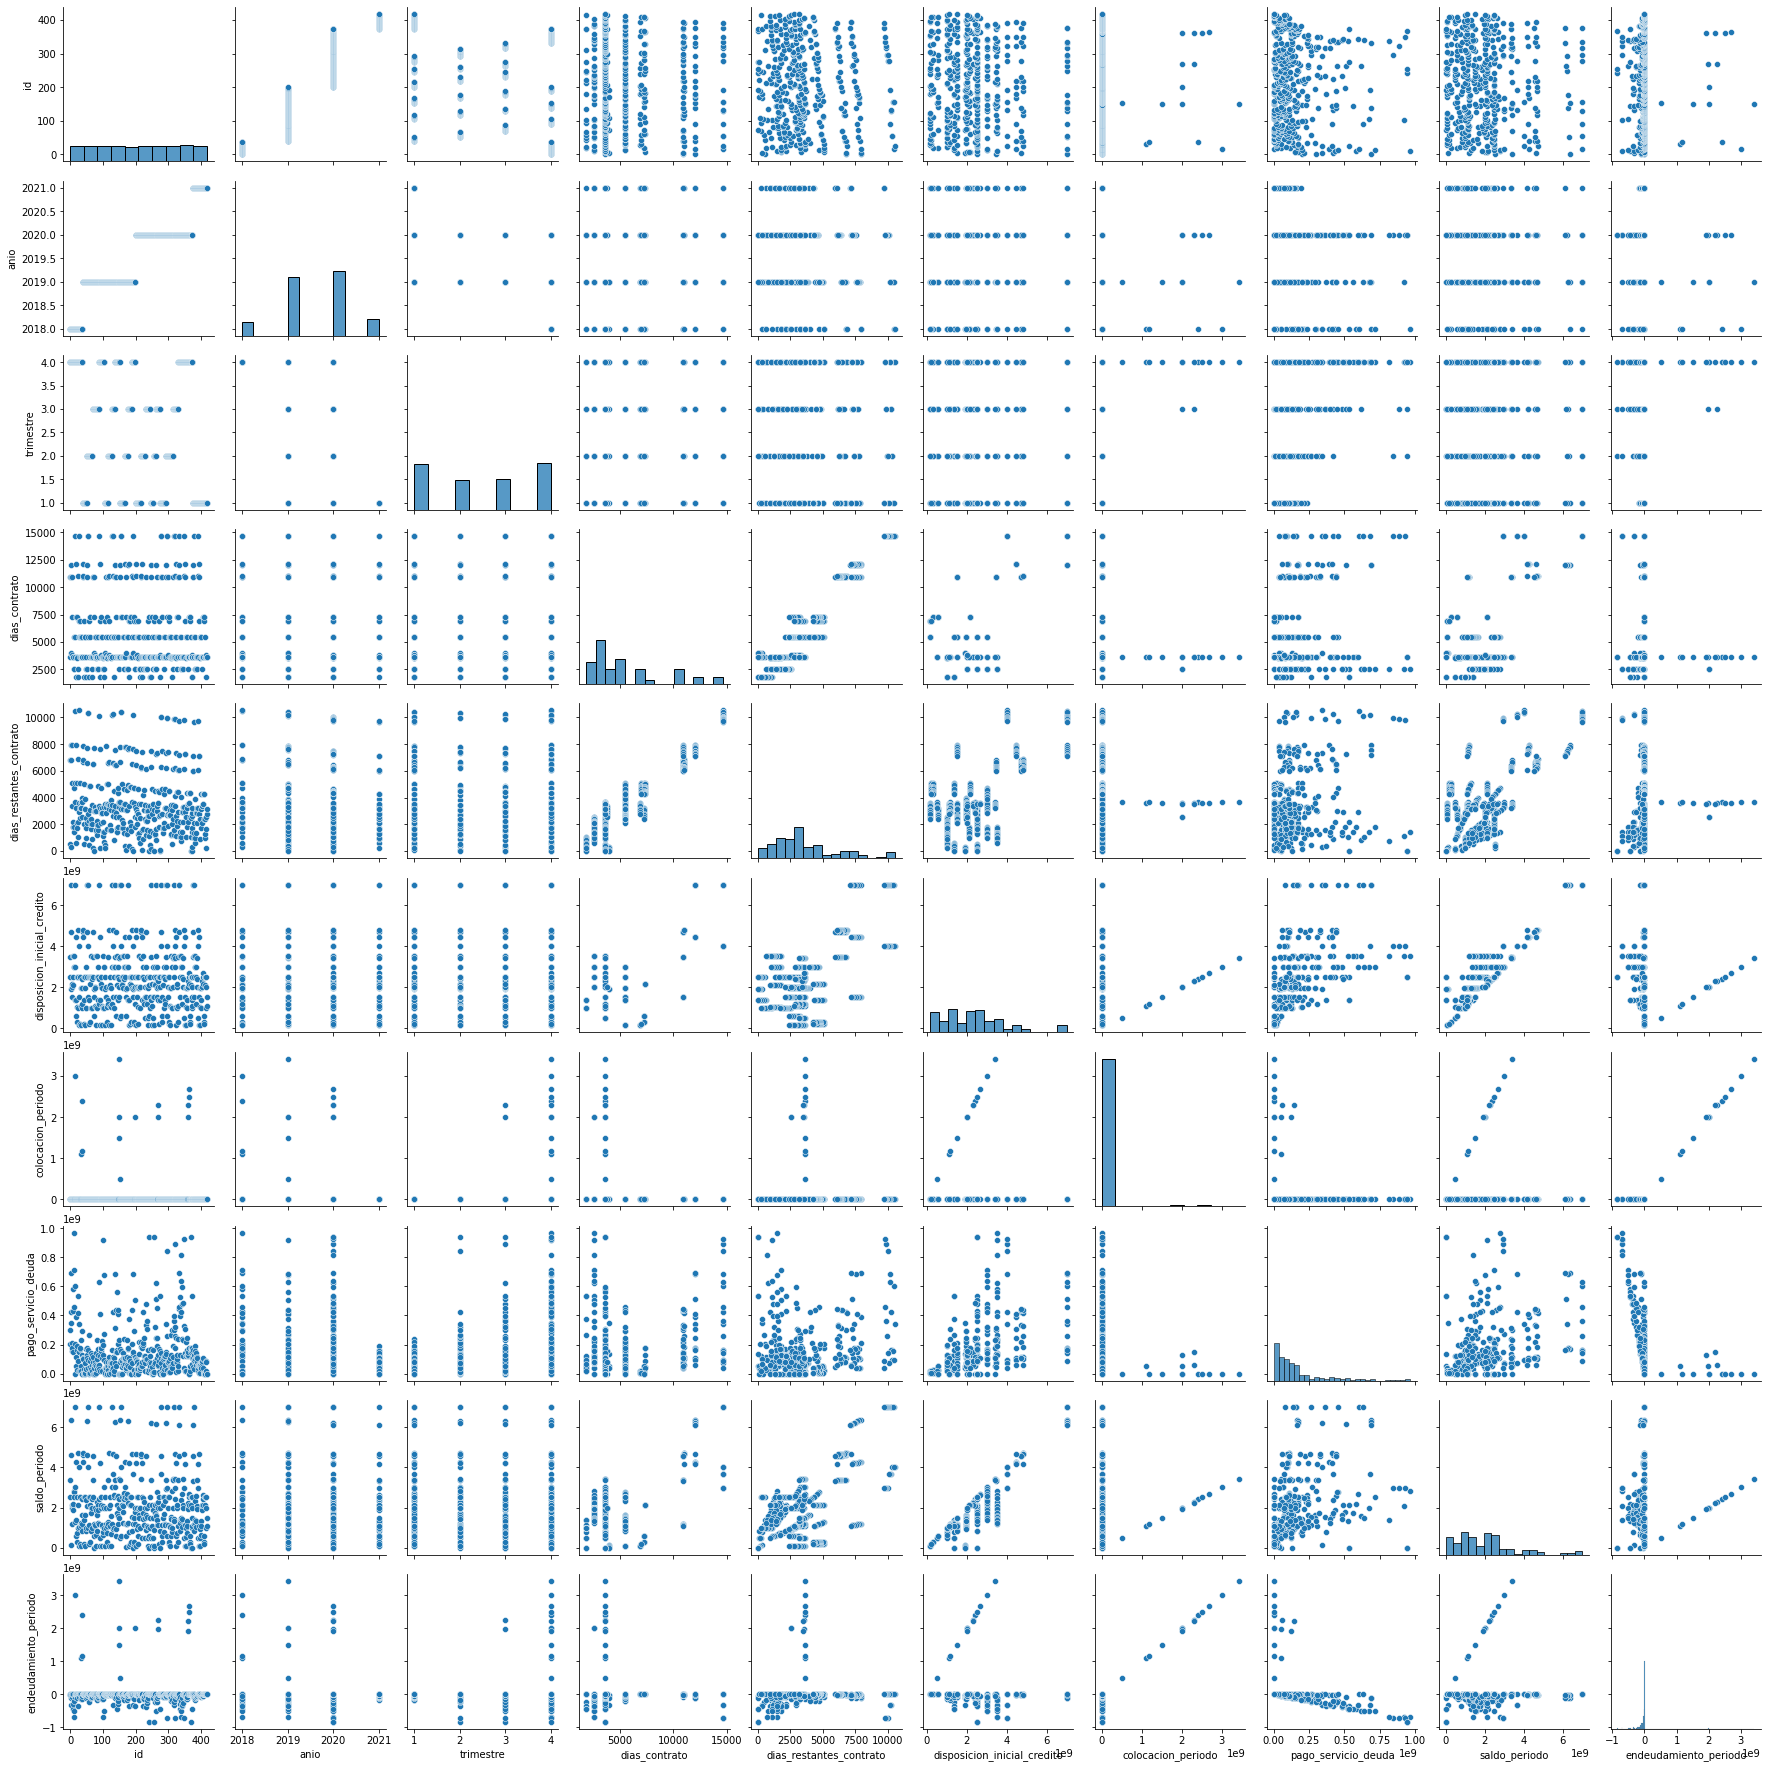

In [5]:
sns.pairplot(datos)

**Coeficiente de determinación o R^2**

los resultados negtaivos indican una mala predicción

# Coeficiente de determinación 

In [ ]:
sns.scatterplot(x=datos['saldo_periodo'],y=datos['dias_restantes_contrato'])

Se graficó un scatterplot para observar individualmente la relación entre el saldo del periodo y los días restantes 

In [ ]:
linear_regression=LinearRegression()
linear_regression.fit(datos['saldo_periodo'].to_frame(),datos['dias_restantes_contrato'])
y_predict=linear_regression.predict(datos['saldo_periodo'].to_frame())

sns.scatterplot(x=datos['saldo_periodo'], y=datos['dias_restantes_contrato']);
sns.lineplot(x=datos['saldo_periodo'], y=y_predict, color='g');
score=linear_regression.score(datos['saldo_periodo'].to_frame(), datos['dias_restantes_contrato'])
print(f'Score:{score:.2f}')


Después del entrenamiento del modelo se obtuvo un coeficiente de 0.42 que indica que el modelo no tiene una aproximación muy cercana a los datos reales

In [ ]:
sns.scatterplot(x=datos['pago_servicio_deuda'],y=datos['disposicion_inicial_credito'])

Se graficó un scatterplot para observar individualmente la relación entre el pago del servicio de deuda y la disposición inicial del crédito. 

In [ ]:
linear_regression=LinearRegression()
linear_regression.fit(datos['pago_servicio_deuda'].to_frame(),datos['disposicion_inicial_credito'])
y_predict=linear_regression.predict(datos['pago_servicio_deuda'].to_frame())

sns.scatterplot(x=datos['pago_servicio_deuda'], y=datos['disposicion_inicial_credito']);
sns.lineplot(x=datos['pago_servicio_deuda'], y=y_predict, color='g');
score=linear_regression.score(datos['pago_servicio_deuda'].to_frame(), datos['disposicion_inicial_credito'])
print(f'Score:{score:.2f}')

Después del entrenamiento del modelo se obtuvo un coeficiente de 0.22 que indica que el modelo no tiene una aproximación muy cercana a los datos reales y es aún menor que la del modelo de las variables anteriores

In [ ]:
sns.scatterplot(x=datos['saldo_periodo'],y=datos['disposicion_inicial_credito'])

Se graficó un scatterplot para observar individualmente la relación entre la disposición inicial del crédito y el saldo de periodo, que presentan la mayor relación observada. 

In [ ]:
linear_regression=LinearRegression()
linear_regression.fit(datos['saldo_periodo'].to_frame(),datos['disposicion_inicial_credito'])
y_predict=linear_regression.predict(datos['saldo_periodo'].to_frame())

sns.scatterplot(x=datos['saldo_periodo'], y=datos['disposicion_inicial_credito']);
sns.lineplot(x=datos['saldo_periodo'], y=y_predict, color='g');
score=linear_regression.score(datos['saldo_periodo'].to_frame(), datos['disposicion_inicial_credito'])
print(f'Score:{score:.2f}')

Después del entrenamiento del modelo se obtuvo un coeficiente de 0.89 que indica que el modelo tiene una aproximación muy cercana a los datos reales superando los resultados anteriores.